In [4]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import copy
import torch
import os
from synthetic_env_julia_solver import synthetic_env
from naive_agents import DoNothing, FixedPhi
#from dynamic_phi_agent import DynamicPhiAgent
from actor_physicists_new import RL_phi_agent

In [5]:
beta = 0.1
kappa = 0.001
D = 0.1
nu = 0.99
start_sep = 0.75

In [6]:
"""
given an agent wil return an array of avg cumlative reward at each time step for num_eps
"""
def agent_avg_cum_reward(agent, time_horizon, sep_size=0.02*np.pi,num_eps=100):
    env = synthetic_env(start_sep,beta,kappa,D,nu)
    env.limit = time_horizon
    cum_rew=np.zeros(int(env.limit/env.deltaT))
    for i in range(0,num_eps):
        time_step=0
        episode_rew=0
        while not env.isOver():
            action=agent.sample_action(env.getState())
            reward = env.step(action)
            episode_rew += reward
            cum_rew[time_step] += episode_rew
            time_step += 1
        env.reset()
    
    return cum_rew/num_eps

In [7]:
fixed_phi = FixedPhi(2.0) # need to retune
optimal = FixedPhi(0.574)
t_end = 10

In [8]:
model_list = os.listdir("./saved_models")

julia_num_env_0.201_5.0.pt
julia_num_env_1.101_5.0.pt
julia_num_env_0.574.pt
julia_num_env_0.701_5.0.pt
julia_num_env_2.001_5.0.pt
julia_num_env_2.701_5.0.pt


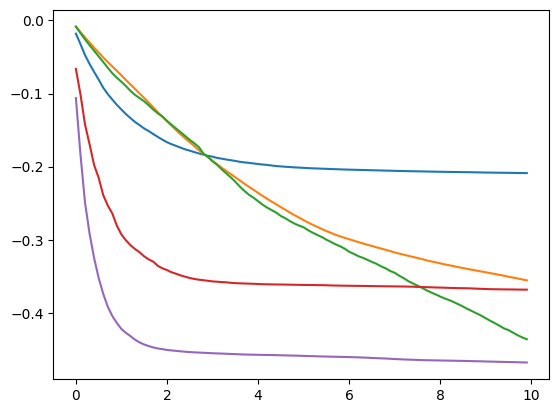

In [17]:
count=0
dt = t_end/len(results) 
for model in model_list:
    agent = RL_phi_agent(action_scale = 5.)
    agent.load_policy(f"saved_models/{model}")
    print(model)
    results = agent_avg_cum_reward(agent, t_end,num_eps=10)
    if model != "julia_num_env_0.201_5.0.pt":
        plt.plot(np.arange(0,t_end,dt),results)
    count+=1
    if count > 5:
        break

Text(0, 0.5, 'reward')

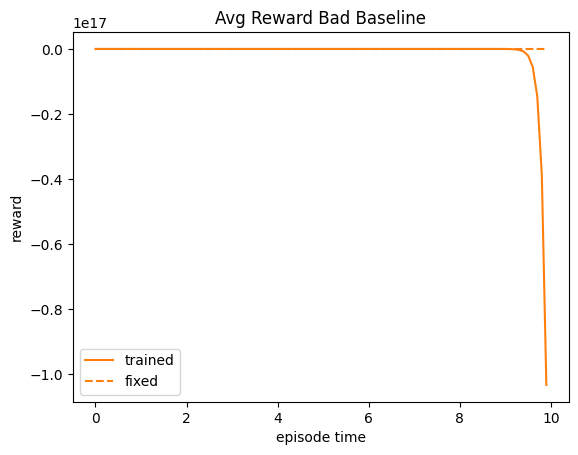

In [40]:
phi = 0.201
fixed_phi = FixedPhi(phi) # need to retune
agent = RL_phi_agent(action_scale = 5.)
agent.load_policy(f"saved_models/julia_num_env_{phi}_5.0.pt")
results = agent_avg_cum_reward(agent, t_end,num_eps=10)
plt.plot(np.arange(0,t_end,dt),results, "C1")
results = agent_avg_cum_reward(fixed_phi, t_end,num_eps=10)
plt.plot(np.arange(0,t_end,dt),results,"C1--")
plt.legend(labels=["trained","fixed"])

plt.title(f"Avg Reward Bad Baseline")
plt.xlabel("episode time")
plt.ylabel("reward")

Text(0, 0.5, 'reward')

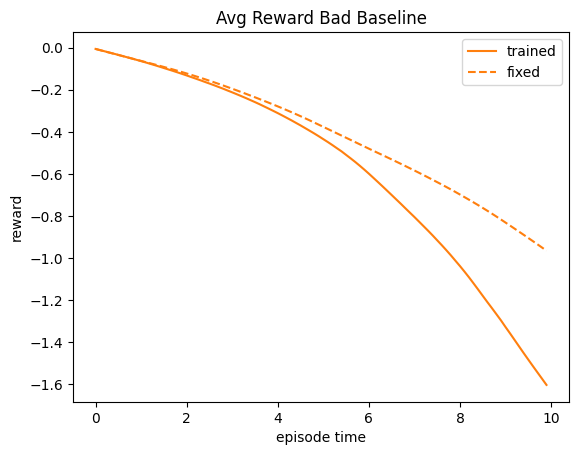

In [41]:
phi = 0.101
fixed_phi = FixedPhi(phi) # need to retune
agent = RL_phi_agent(action_scale = 5.)
agent.load_policy(f"saved_models/julia_num_env_{phi}_5.0.pt")
results = agent_avg_cum_reward(agent, t_end,num_eps=50)
plt.plot(np.arange(0,t_end,dt),results, "C1")
results = agent_avg_cum_reward(fixed_phi, t_end,num_eps=50)
plt.plot(np.arange(0,t_end,dt),results,"C1--")
plt.legend(labels=["trained","fixed"])

plt.title(f"Avg Reward Bad Baseline")
plt.xlabel("episode time")
plt.ylabel("reward")

In [14]:
results = agent_avg_cum_reward(fixed_phi, t_end,num_eps=10)

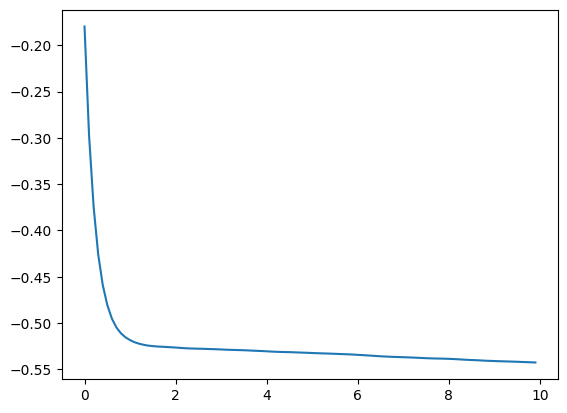

In [15]:
dt = t_end/len(results) 
plt.plot(np.arange(0,t_end,dt),results)

In [1]:

# Get the list of all files and directories
dir_list = os.listdir("./saved_models")
#print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)

['julia_num_env_0.201_5.0.pt', 'julia_num_env_1.101_5.0.pt', 'julia_num_env_0.574.pt', 'julia_num_env_0.701_5.0.pt', 'julia_num_env_2.001_5.0.pt', 'julia_num_env_2.701_5.0.pt', 'julia_num_env_2.101_5.0.pt', 'julia_num_env_2.501_5.0.pt', 'julia_num_env_0.601_5.0.pt', 'julia_num_env_1.501_5.0.pt', 'julia_num_env_0.901_5.0.pt', 'julia_num_env_0.401_5.0.pt', 'julia_num_env_2.pt', 'julia_num_env_2.8009999999999997_5.0.pt', 'phi_only_0.3_unfitted_base.pt', 'julia_num_env_1.2009999999999998_5.0.pt', 'julia_num_env_0.501_5.0.pt', 'julia_num_env_1.001_5.0.pt', 'julia_num_env_0.801_5.0.pt', 'julia_num_env_2.901_5.0.pt', 'julia_num_env_1.301_5.0.pt', 'julia_num_env_0.101_5.0.pt', 'julia_num_env_1.601_5.0.pt', 'julia_num_env_1.801_5.0.pt', 'julia_num_env_1.7009999999999998_5.0.pt', 'julia_num_env_0.301_5.0.pt', 'julia_num_env_0.001_5.0.pt', 'julia_num_env_0.199_5.0.pt', 'julia_num_env_1.4009999999999998_5.0.pt', 'julia_num_env_0.574_10.0.pt', 'julia_num_env_2.601_5.0.pt', 'julia_num_env_2.201_5.0.